<a href="https://colab.research.google.com/github/naya18g/Project/blob/main/Precipitation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np            
data = pd.read_csv('dataset.csv')         
data

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-27,1.12,NaN,0.01,NaN,66,55,270.0,260.0,8.9,18.1,1.0,NaN,1.0
1823,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-28,4.70,NaN,1.81,NaN,56,47,90.0,260.0,14.1,21.0,1.0,NaN,NaN
1824,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-29,1.57,NaN,0.00,NaN,65,42,340.0,360.0,10.1,18.1,NaN,NaN,NaN
1825,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-30,0.45,NaN,0.00,NaN,69,44,260.0,260.0,6.9,12.1,NaN,NaN,NaN


In [ ]:
data.describe()

,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
count,1823.000000,62.000000,1827.000000,0.0,1827.000000,1827.000000,1822.000000,1809.000000,1823.000000,1809.000000,551.0,39.0,861.0
mean,1.675710,1404.854839,0.035720,NaN,76.498632,58.120416,254.143798,256.428966,9.062095,14.721669,1.0,1.0,1.0
std,0.909434,350.813754,0.189859,NaN,9.133929,7.223756,54.756284,55.571902,2.016827,3.622257,0.0,0.0,0.0
min,0.000000,103.000000,0.000000,NaN,52.000000,38.000000,10.000000,10.000000,2.900000,6.000000,1.0,1.0,1.0
25%,1.120000,1337.500000,0.000000,NaN,70.000000,53.000000,260.000000,270.000000,8.100000,12.100000,1.0,1.0,1.0
50%,1.570000,1442.500000,0.000000,NaN,76.000000,58.000000,270.000000,270.000000,8.900000,14.100000,1.0,1.0,1.0
75%,2.010000,1545.000000,0.000000,NaN,83.000000,64.000000,270.000000,280.000000,10.100000,16.100000,1.0,1.0,1.0
max,8.050000,2314.000000,2.670000,NaN,111.000000,79.000000,360.000000,360.000000,21.000000,34.000000,1.0,1.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1827 non-null   object 
 1   NAME     1827 non-null   object 
 2   DATE     1827 non-null   object 
 3   AWND     1823 non-null   float64
 4   PGTM     62 non-null     float64
 5   PRCP     1827 non-null   float64
 6   TAVG     0 non-null      float64
 7   TMAX     1827 non-null   int64  
 8   TMIN     1827 non-null   int64  
 9   WDF2     1822 non-null   float64
 10  WDF5     1809 non-null   float64
 11  WSF2     1823 non-null   float64
 12  WSF5     1809 non-null   float64
 13  WT01     551 non-null    float64
 14  WT02     39 non-null     float64
 15  WT08     861 non-null    float64
dtypes: float64(11), int64(2), object(3)
memory usage: 228.5+ KB


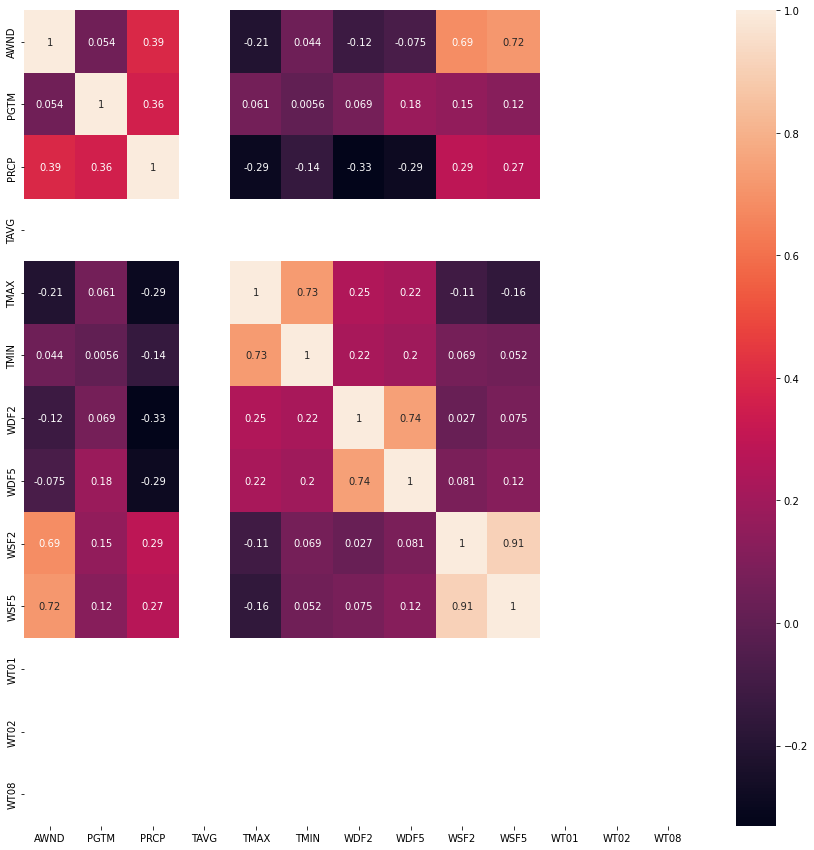

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = data.corr()
plt.figure(figsize = (15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
data['PRCP'][data.PRCP>0]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['STATION'].unique()


array(['USW00093134'], dtype=object)

In [ ]:
data['NAME'].unique()

array(['LOS ANGELES DOWNTOWN USC, CA US'], dtype=object)

In [ ]:
data['PGTM'].value_counts()
data['PGTM'].isna().sum()

1765

In [ ]:
data['TAVG'].isna().sum()

1827

In [ ]:
data['WT01'].isna().sum()

1276

In [ ]:
data['WT02'].isna().sum()

1788

In [ ]:
data['WT08'].isna().sum()

966

In [ ]:
data.drop('PGTM',axis=1,inplace=True)
data.drop('TAVG',axis=1,inplace=True)
data.drop('WT02',axis=1,inplace=True)
data.drop('STATION',axis=1,inplace=True)
data.drop('NAME',axis=1,inplace=True)


In [ ]:
data

,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,2016-01-01,2.46,0.0,64,43,10.0,30.0,8.1,11.0,NaN,1.0
1,2016-01-02,2.01,0.0,65,47,270.0,30.0,6.0,8.9,NaN,NaN
2,2016-01-03,0.67,0.0,62,44,150.0,150.0,10.1,14.1,NaN,NaN
3,2016-01-04,1.34,1.0,69,55,270.0,280.0,8.1,14.1,NaN,NaN
4,2016-01-05,2.46,1.0,59,49,140.0,140.0,10.1,16.1,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1822,2020-12-27,1.12,1.0,66,55,270.0,260.0,8.9,18.1,1.0,1.0
1823,2020-12-28,4.70,1.0,56,47,90.0,260.0,14.1,21.0,1.0,NaN
1824,2020-12-29,1.57,0.0,65,42,340.0,360.0,10.1,18.1,NaN,NaN
1825,2020-12-30,0.45,0.0,69,44,260.0,260.0,6.9,12.1,NaN,NaN


In [ ]:
data['DATE'].isna().sum()

0

In [ ]:
data['AWND'].isna().sum()

4

In [ ]:
data['PRCP'].isna().sum()

0

In [ ]:
data['TMAX'].isna().sum()

0

In [ ]:
data['TMIN'].isna().sum()

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


0

In [ ]:
data['WDF2'].isna().sum()

5

In [ ]:
data['WDF5'].isna().sum()

18

In [ ]:
data['WSF2'].isna().sum()

4

In [ ]:
data['WSF5'].isna().sum()

18

In [ ]:
data['WT01'].isna().sum()

1276

In [ ]:
data['WT08'].isna().sum()

966

In [ ]:
data['AWND'] = data['AWND'].fillna(data['AWND'].mode()[0])
data['WDF2'] = data['WDF2'].fillna(data['WDF2'].mode()[0])
data['WDF5'] = data['WDF5'].fillna(data['WDF5'].mode()[0])
data['WSF2'] = data['WSF2'].fillna(data['WSF2'].mode()[0])
data['WSF5'] = data['WSF5'].fillna(data['WSF5'].mode()[0])


In [ ]:
data

,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,2016-01-01,2.46,0.0,64,43,10.0,30.0,8.1,11.0,NaN,1.0
1,2016-01-02,2.01,0.0,65,47,270.0,30.0,6.0,8.9,NaN,NaN
2,2016-01-03,0.67,0.0,62,44,150.0,150.0,10.1,14.1,NaN,NaN
3,2016-01-04,1.34,1.0,69,55,270.0,280.0,8.1,14.1,NaN,NaN
4,2016-01-05,2.46,1.0,59,49,140.0,140.0,10.1,16.1,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1822,2020-12-27,1.12,1.0,66,55,270.0,260.0,8.9,18.1,1.0,1.0
1823,2020-12-28,4.70,1.0,56,47,90.0,260.0,14.1,21.0,1.0,NaN
1824,2020-12-29,1.57,0.0,65,42,340.0,360.0,10.1,18.1,NaN,NaN
1825,2020-12-30,0.45,0.0,69,44,260.0,260.0,6.9,12.1,NaN,NaN


In [ ]:
data['PRCP'].value_counts()

0.0    1660
1.0     167
Name: PRCP, dtype: int64

In [ ]:
major_class = data[data['PRCP'] == 0]
minor_class = data[data['PRCP'] == 1]

print("Number of examples with PRCP value 0 =", major_class.shape[0])
print("Number of examples with PRCP value 1 =", minor_class.shape[0])

Number of examples with PRCP value 0 = 1660
Number of examples with PRCP value 1 = 167


In [ ]:
from sklearn.utils import resample

major_class_downsampled = resample(major_class, random_state = 50, replace  = True, n_samples = 913)
minor_class_upsampled = resample(minor_class, random_state = 50, replace  = True, n_samples = 914)

data = pd.concat([major_class_downsampled, minor_class_upsampled])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 1667 to 355
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1827 non-null   object 
 1   AWND    1827 non-null   float64
 2   PRCP    1827 non-null   float64
 3   TMAX    1827 non-null   int64  
 4   TMIN    1827 non-null   int64  
 5   WDF2    1827 non-null   float64
 6   WDF5    1827 non-null   float64
 7   WSF2    1827 non-null   float64
 8   WSF5    1827 non-null   float64
 9   WT01    950 non-null    float64
 10  WT08    731 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 171.3+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder  
label_encoder_y= LabelEncoder() 

data['DATE']= label_encoder_y.fit_transform(data['DATE'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 1667 to 355
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1827 non-null   int64  
 1   AWND    1827 non-null   float64
 2   PRCP    1827 non-null   float64
 3   TMAX    1827 non-null   int64  
 4   TMIN    1827 non-null   int64  
 5   WDF2    1827 non-null   float64
 6   WDF5    1827 non-null   float64
 7   WSF2    1827 non-null   float64
 8   WSF5    1827 non-null   float64
 9   WT01    950 non-null    float64
 10  WT08    731 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 171.3 KB


In [ ]:
data.drop('WT01',axis=1,inplace=True)
data.drop('WT08',axis=1,inplace=True)

In [ ]:
data

,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
1667,826,1.79,0.0,80,61,260.0,260.0,8.9,15.0
128,58,2.24,0.0,71,57,270.0,270.0,10.1,17.0
1449,699,1.34,0.0,77,50,100.0,90.0,6.0,8.9
151,67,2.01,0.0,74,60,270.0,280.0,8.9,14.1
84,38,1.79,0.0,78,54,280.0,270.0,8.9,14.1
...,...,...,...,...,...,...,...,...,...
851,403,2.24,1.0,61,55,150.0,170.0,10.1,15.0
629,296,2.68,1.0,73,64,270.0,280.0,12.1,18.1
290,127,2.24,1.0,73,61,280.0,280.0,10.1,15.0
370,166,3.80,1.0,65,54,270.0,110.0,8.9,13.0


In [ ]:
data.describe()

,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,436.035030,2.071680,0.500274,71.143404,56.060208,228.286809,233.552271,9.646415,15.823153
std,258.303147,1.225508,0.500137,9.411443,6.417877,78.594366,77.533322,2.459005,4.375594
min,0.000000,0.000000,0.000000,52.000000,38.000000,10.000000,10.000000,2.900000,6.000000
25%,193.500000,1.120000,0.000000,64.000000,52.000000,250.000000,260.000000,8.100000,13.000000
50%,434.000000,1.790000,1.000000,69.000000,55.000000,270.000000,270.000000,8.900000,15.000000
75%,669.500000,2.460000,1.000000,78.000000,61.000000,270.000000,270.000000,10.100000,17.000000
max,900.000000,7.160000,1.000000,104.000000,76.000000,360.000000,360.000000,21.000000,34.000000


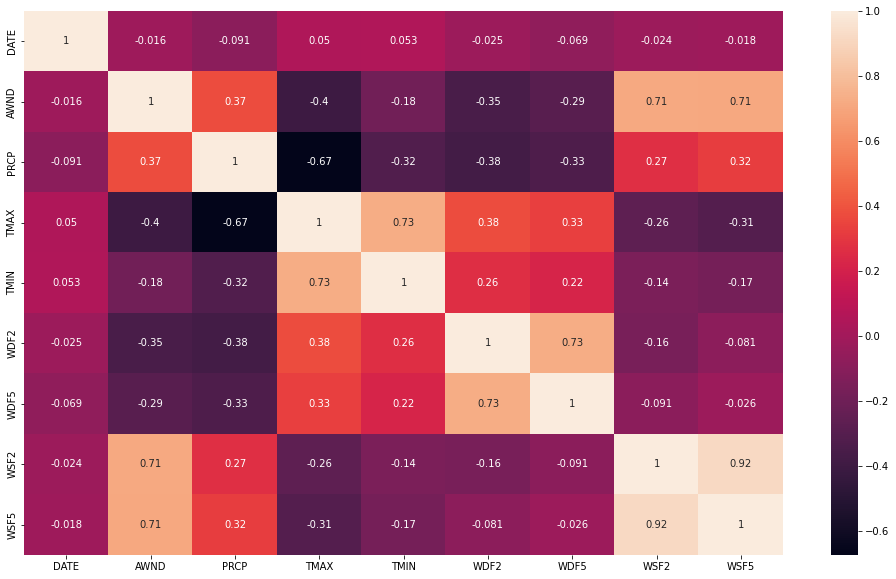

In [ ]:
corrMatrix = data.corr()
plt.figure(figsize = (17,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaler.transform(data)

array([[0.91777778, 0.25      , 0.        , ..., 0.71428571, 0.33149171,
        0.32142857],
       [0.06444444, 0.31284916, 0.        , ..., 0.74285714, 0.39779006,
        0.39285714],
       [0.77666667, 0.18715084, 0.        , ..., 0.22857143, 0.17127072,
        0.10357143],
       ...,
       [0.14111111, 0.31284916, 1.        , ..., 0.77142857, 0.39779006,
        0.32142857],
       [0.18444444, 0.53072626, 1.        , ..., 0.28571429, 0.33149171,
        0.25      ],
       [0.17666667, 0.40642458, 1.        , ..., 0.17142857, 0.50828729,
        0.49642857]])

In [ ]:
train_features = ['DATE',	'AWND',	'TMAX',	'TMIN',	'WDF2',	'WDF5',	'WSF2',	'WSF5']
X = data[train_features]
y = data.PRCP
x1 = X.astype(int)
y1 = y.astype(int)

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(x1,y1)   
fit.scores_    

array([2304.20403746,  219.05978651, 1032.77267255,  135.69777077,
       6972.90924865, 5131.56126124,  107.70009181,  225.43878307])

In [ ]:
X_new=test.fit_transform(x1, y1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_new,y1,test_size=0.2,random_state=55)

In [ ]:

!pip install catboost
from catboost import CatBoostClassifier


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
ml = CatBoostClassifier(verbose=0, 
                        depth=12,
                        learning_rate=0.01,
                        n_estimators=4000,
                        l2_leaf_reg=2,
                        od_pval=2,
                        od_wait="Iter")

In [ ]:
ml.fit(x_train, y_train,
       verbose=5, early_stopping_rounds=50,
       eval_set=[(x_test, y_test)],)
y_pred=ml.predict(x_test)

0:	learn: 0.6822162	test: 0.6825221	best: 0.6825221 (0)	total: 18.6ms	remaining: 1m 14s
5:	learn: 0.6363913	test: 0.6353789	best: 0.6353789 (5)	total: 113ms	remaining: 1m 15s
10:	learn: 0.5909343	test: 0.5886803	best: 0.5886803 (10)	total: 188ms	remaining: 1m 8s
15:	learn: 0.5504485	test: 0.5489896	best: 0.5489896 (15)	total: 276ms	remaining: 1m 8s
20:	learn: 0.5188941	test: 0.5171894	best: 0.5171894 (20)	total: 341ms	remaining: 1m 4s
25:	learn: 0.4848905	test: 0.4842590	best: 0.4842590 (25)	total: 419ms	remaining: 1m 4s
30:	learn: 0.4533080	test: 0.4530862	best: 0.4530862 (30)	total: 503ms	remaining: 1m 4s
35:	learn: 0.4259139	test: 0.4265868	best: 0.4265868 (35)	total: 574ms	remaining: 1m 3s
40:	learn: 0.3983679	test: 0.3994256	best: 0.3994256 (40)	total: 650ms	remaining: 1m 2s
45:	learn: 0.3763805	test: 0.3776948	best: 0.3776948 (45)	total: 724ms	remaining: 1m 2s
50:	learn: 0.3607838	test: 0.3618481	best: 0.3618481 (50)	total: 782ms	remaining: 1m
55:	learn: 0.3441054	test: 0.3464351

In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,0
1,0
2,1
3,0
4,0
...,...
361,0
362,1
363,0
364,1


In [ ]:
import math
math.sqrt(mean_squared_error(y_test,y_pred))

0.1168811455530461

In [ ]:
ml.score(x_test,y_test)

0.9863387978142076

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9864130434782609

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9863387978142076